# Preliminary data analysis

Here we deal with the preliminary data analysis of the graph, Reddit data as well as event series.

### 1) Import packages

In [2]:
import os
from pathlib import Path
import json
import bz2

from pprint import pprint 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

from tqdm.notebook import tqdm
tqdm.pandas()

from collections import Counter, OrderedDict

import networkx as nx
from networkx.readwrite import json_graph

import netwulf as nw

In [5]:
def read_json_file(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)

In [3]:
DATA_DIR = Path(os.getcwd()) / 'data'

### 2) Climate Change Opinion classifier

### 3) Reddit submission and comments

In [3]:
# TODO:

In [4]:
submissions.__len__() - filtered_submissions.__len__()

NameError: name 'submissions' is not defined

In [ ]:
submissions.shape

In [ ]:
comments.shape

In [ ]:
comments.__len__() - filtered_comments.__len__()

### 4) ClimateGraph

We start by loading the Reddit-ClimateGraph for the year 2020.

In [4]:
year = 2020
ClimateGraph = read_json_file(DATA_DIR / f'{year}/ClimateGraph_{year}.json')

Let's investigate some basic properties of the network, such as the size.

In [5]:
print(f"Number of nodes: {ClimateGraph.number_of_nodes()}")
print(f"Number of edges: {ClimateGraph.number_of_edges()}")

Number of nodes: 64260
Number of edges: 95736


As is seen in the figures below, the degree-distributions of this network is following a power law, meaning that many Reddit authors have low in- and out-reach, yet a small minority of the Reddit authors have respectively high in- and out-reach.

In [6]:
in_degree = pd.Series(np.array(list(zip(*ClimateGraph.in_degree())))[1].astype('int'))
out_degree = pd.Series(np.array(list(zip(*ClimateGraph.out_degree())))[1].astype('int'))
degree = pd.Series(np.array(list(zip(*ClimateGraph.degree())))[1].astype('int'))

df_degrees = pd.DataFrame([in_degree, out_degree, degree], index=['in-degree', 'out-degree', 'degree']).T
df_degrees.describe()

,in-degree,out-degree,degree
count,64260.000000,64260.000000,64260.000000
mean,1.489823,1.489823,2.979645
std,7.764975,3.350204,9.260341
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000
50%,1.000000,1.000000,2.000000
75%,1.000000,1.000000,3.000000
max,732.000000,604.000000,732.000000


In [7]:
# define plotting function
def LogAndLinearHist(data, xlabel='', figsize=((8,3)), dpi=100):
    min_val, max_val = (min(data), max(data))
    
    # compute bins
    log_bins = np.logspace(min_val if min_val == 0 else np.log10(min_val), np.log10(max_val), 101)
    lin_bins = np.linspace(min_val, max_val, 101)

    # create histogram values
    hist_log, edges_log = np.histogram(data.values, log_bins, density=True)
    hist_lin, edges_lin = np.histogram(data.values, lin_bins)

    # determine x-values
    log_x = (edges_log[1:] + edges_log[:-1]) / 2.
    lin_x = (edges_lin[1:] + edges_lin[:-1]) / 2.

    xx, yy = zip(*[(i,j) for (i,j) in zip(log_x, hist_log) if j > 0])
    
    # plot figure
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize, dpi=dpi)

    # linear scale plot
    ax[0].plot(lin_x, hist_lin, marker='.', alpha=0.5)
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel('count')
    ax[0].set_title('linear scale')
    #ax[0].legend()

    # log-log scale plot
    ax[1].plot(xx, yy, marker='.', alpha=0.5)
    ax[1].set_yscale('log')
    ax[1].set_xscale('log')
    ax[1].set_xlabel(xlabel)
    ax[1].set_ylabel('probability density')
    ax[1].set_title('log-log scale')
    #ax[1].legend()

    # show figure
    plt.tight_layout()
    plt.show()

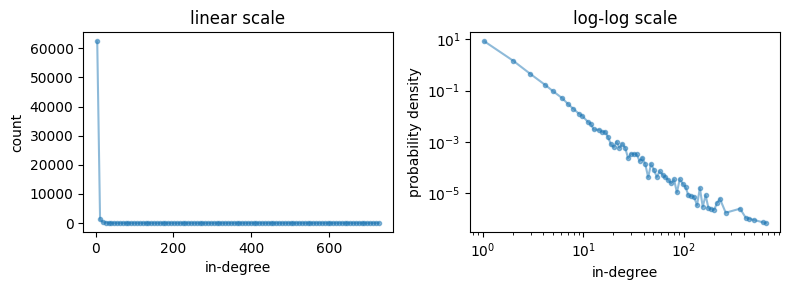

In [8]:
LogAndLinearHist(in_degree, xlabel='in-degree')

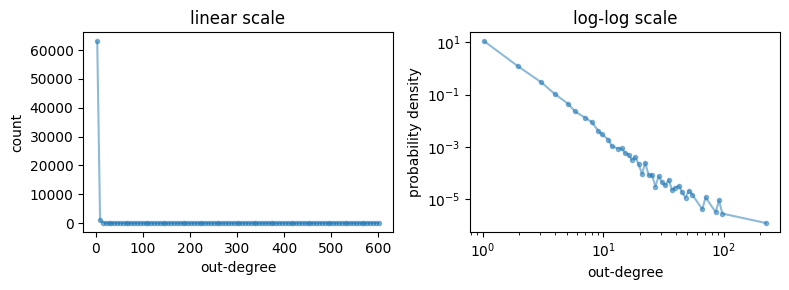

In [9]:
LogAndLinearHist(out_degree, xlabel='out-degree')

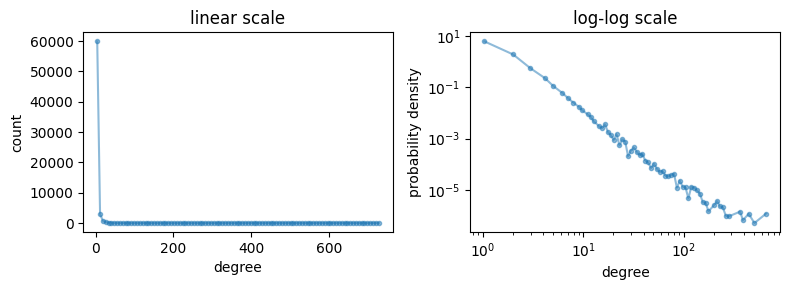

In [10]:
LogAndLinearHist(degree, xlabel='degree')

The power law distribution means that there, e.g., is only 98 Reddit authors that are referrenced to by more than 50 other Reddit authors.

In [58]:
print(f"Number of authors with in-degree above 50: {(in_degree > 50).sum()}")

Number of authors with in-degree above 50: 98


One of the key properties of the ClimateGraph is the associated opinion score. This score is individual for each author and was created as the average opinion across their respective comments and submissions to climate change within the year. This score distribution is key for decision-making related to the research questions.

The distribution of opinion scores is visualized in the plots below.

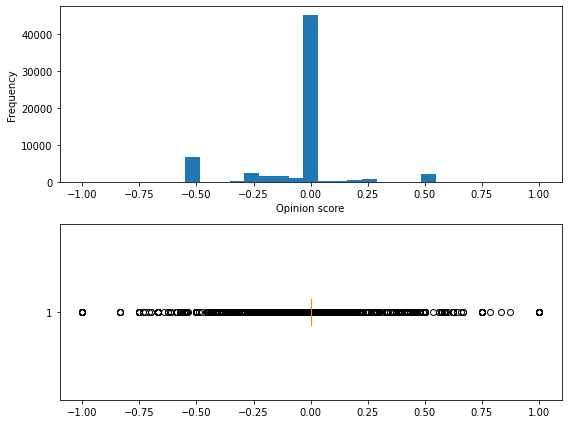

In [11]:
opinion_distribution = pd.Series(nx.get_node_attributes(ClimateGraph, 'opinion_score').values())

plt.figure(figsize=((8,6)))
ax1 = plt.subplot(211)
opinion_distribution.plot(kind='hist', bins=31)
plt.xlabel('Opinion score')

plt.subplot(212, sharex=ax1)
plt.boxplot(opinion_distribution, vert=False)

plt.tight_layout()
plt.show()

As can be seen in the figures and in the list of descriptive statistics below, the full range of the opinion score (which is between -1 and 1) is exploited, yet, the majority of authors end up with an opinion score close to 1, which originates from textual content about either News or having a neutral opinion on whether climate change is man-made or not.

In [12]:
opinion_distribution.describe()

count    64260.000000
mean        -0.050748
std          0.202097
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
dtype: float64

Number of Reddit authors with at least one award: 135


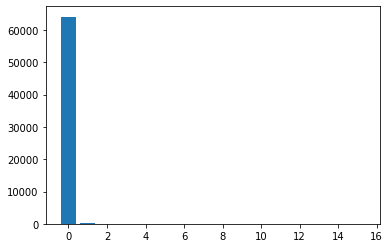

In [38]:
award_distribution = pd.Series(nx.get_node_attributes(ClimateGraph, 'total_awards_received').values())
print(f"Number of Reddit authors with at least one award: {(award_distribution > 0).sum()}")

award_distribution = Counter(award_distribution)

plt.bar(award_distribution.keys(), award_distribution.values())
plt.show()

In [39]:
OrderedDict(sorted(award_distribution.items(), key=lambda x: x[0]))

OrderedDict([(0, 64125),
             (1, 109),
             (2, 12),
             (3, 8),
             (4, 3),
             (6, 1),
             (7, 1),
             (15, 1)])

### 5) ClimateGraph - Network Evolution

Here the network evolution across time is investigated and plotted to see if there is a potential benefit of investigating the network structure with a temporal viewpoint not covered in this project.

In [6]:
temporal_ClimateGraph = pd.DataFrame([])

years = [2017, 2018, 2020]
for i, year in enumerate(tqdm(years)):
    
    ClimateGraph = read_json_file(DATA_DIR / f'{year}/ClimateGraph_{year}.json')
    opinion_dict = nx.get_node_attributes(ClimateGraph, 'opinion_score')
    
    nodes = ClimateGraph.number_of_nodes()
    edges = ClimateGraph.number_of_edges()
    
    mean_opinion = np.mean(list(opinion_dict.values()))
    var_opinion = np.std(list(opinion_dict.values()))
    
    temp = pd.DataFrame.from_dict({'nodes': [nodes],
                                   'edges': [edges],
                                   'mean_opinion': [mean_opinion],
                                   'var_opinion': [var_opinion],
                                   'year': year,
                                  })
    
    temporal_ClimateGraph = pd.concat([temporal_ClimateGraph, temp]).reset_index(drop=True)

# add sentiment label
temporal_ClimateGraph['opinion'] = temporal_ClimateGraph.mean_opinion.apply(lambda x: 'Pro' if x > 0.2 \
                                                                            else 'Anti' if x < -0.2 \
                                                                            else 'Neutral')

  0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
temporal_ClimateGraph

,nodes,edges,mean_opinion,var_opinion,year,opinion
0,38415,66912,-0.054007,0.207312,2017,Neutral
1,38178,58903,-0.047296,0.212982,2018,Neutral
2,64260,95736,-0.050748,0.202096,2020,Neutral


In [9]:
author = pd.read_json(DATA_DIR / f'author_opinion_{year}.json.bz2')


ValueError: Expected object or value

In [109]:
#temporal_ClimateGraph['mean_opinion'] -= temporal_ClimateGraph['mean_opinion'].mean()

In [111]:
import plotly.express as px

fig = px.scatter(temporal_ClimateGraph,
                 x="year", 
                 y="mean_opinion", color="opinion",
                 size='nodes', hover_data=['edges'])
fig.show()

In [ ]:
# TODO: 
# 1) extra investigation of network drift - in general the network might expand or reduce across time
# 2) some authors might change their opinion across years.